# LeNet

- [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) - A primeira aplicação bem sucedida de uma CNN foi desenvolvida por [Yann LeCun](http://yann.lecun.com) em 1998.


<img src='images/lenet-5.png'/>

# Definindo a Arquitetura da Rede

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
  
# Definindo a CNN
class LeNet(nn.Module):
    
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.features = nn.Sequential(
            
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0),
            nn.ReLU(True)
        )
        self.classifier = nn.Sequential(
            
            nn.Linear(1*1*120, 84),
            nn.ReLU(True),
            
            nn.Linear(84, 10)
        )

    def forward(self, x):
        
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        
        return x;
    
    def name(self):
        return "LeNet"

print(LeNet())

LeNet(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU(inplace)
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


# Algumas funções auxiliares para a exibição das imagens

In [3]:
from PIL import Image
import torchvision.transforms.functional as TF

def read_image(img_path, resize=True):
    image = Image.open(img_path)
    if resize == True:
        image = image.resize((32,32))
    image = TF.to_grayscale(image, num_output_channels=3)
    image = TF.to_tensor(image)
    return image

def show_image_details(image, normalize=False, size=(15,15)):
    fig = plt.figure(figsize = size)
    ax = fig.add_subplot(111) 
    ax.imshow(image, cmap='gray')
    width, height = image.shape
    
    for x in range(width):
        for y in range(height):
            
            ax.annotate("{:.2f}".format(image[x][y]/ 2 + 0.5 if normalize else image[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if image[x][y] <= 0.2 else 'black')
                
def show_dataset_batch(data, target):
    last_row = 0
    for idx in range(len(target)):
        
        if (idx % 10 == 0):
            fig = plt.figure(figsize=(20, 20))

        pos = (idx - (int(np.floor(idx / 10)) * 10) + 1) if idx >= 10 else idx + 1
        ax = fig.add_subplot(1, 10, pos, xticks=[], yticks=[])
        ax.imshow(data[idx][0], cmap='gray')
        ax.set_title(class_names[target[idx]])

    last_row += int(np.floor(len(data) / 10))


def show_dataset(dataloader):
    for data, target in dataloader:
        show_dataset_batch(data, target)
        
def show_filters(filters):
    for filter_group in filters:
        for i in range(len(filter_group)):
            
            if (i%6 == 0):
                fig = plt.figure(figsize=(20,20))
            ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
            ax.imshow(filter_group[i], cmap='gray')
            
            width, height = filter_group[i].shape
            for x in range(width):
                for y in range(height):
                    ax.annotate("{:.2f}".format(filter_group[i][x][y]), xy=(y, x),
                                horizontalalignment='center',
                                verticalalignment='center',
                                color='white' if filter_group[i][x][y] < 0 else 'black')
            

# Definindo os Datasets

In [4]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets

batch_size = 10

dataset_transforms = {
    'train': transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
        #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normaliza os pixels para -1..1
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
        #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normaliza os pixels para -1..1
    ]),    
}
dataset_dir = "datasets/mnist"
image_datasets = {x: datasets.MNIST(dataset_dir, train=(True if x == 'train' else False), download=True, transform=dataset_transforms[x]) for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'test']}                  
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

class_names = classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
n_classes = len(class_names)

print(f"Qtd de total de imagens: {dataset_sizes['train'] + dataset_sizes['test']}")
print(f"Qtd de imagens de treinamento: {dataset_sizes['train']}")
print(f"Qtd de imagens de teste: {dataset_sizes['test']}")
print(f"Classes: {class_names}")


Qtd de total de imagens: 70000
Qtd de imagens de treinamento: 60000
Qtd de imagens de teste: 10000
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


# Exibe algumas imagens do dataset

Imagem de exemplo: (32, 32)


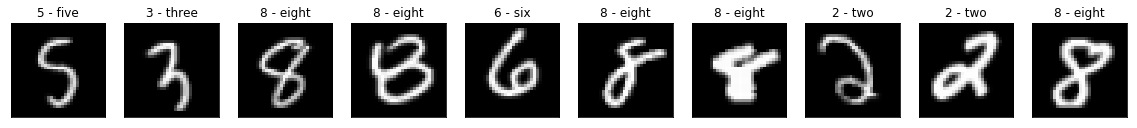

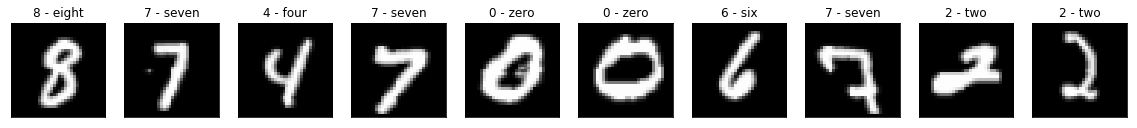

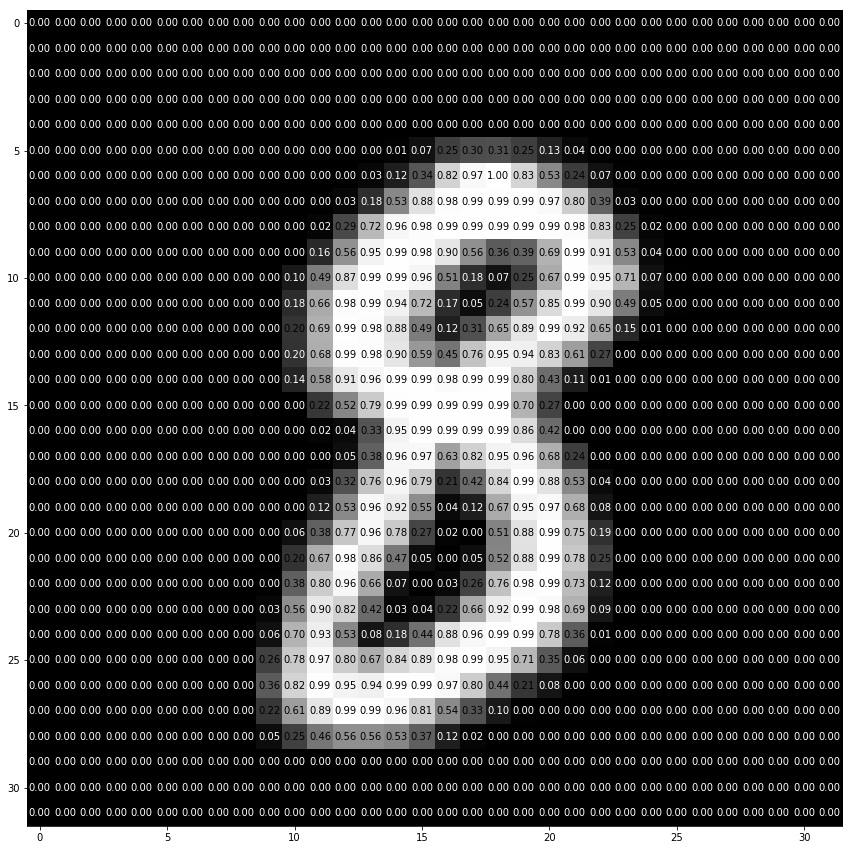

In [5]:
img_exemplo = np.zeros((32, 32))

# exibe algumas imagens do dataset
for batch_i, (data, target) in enumerate(dataloaders['train']):
    show_dataset_batch(data, target)
    if batch_i == 1:
        img_exemplo = data[0][0].numpy()
        break


print(f"Imagem de exemplo: {img_exemplo.shape}")
show_image_details(img_exemplo)
#show_image_details(np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), normalize=False, size=(5, 5))

# Realizando treinamento da rede

In [6]:
import torch.optim as optim

#model = LeNet(torch.from_numpy(img_exemplo).unsqueeze(0).unsqueeze(1))
model = LeNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [7]:
n_epochs = 10
model.train()
for epoch in range(1, n_epochs+1):

    print("")
    print('Epoch {}/{}'.format(epoch, n_epochs))
    print('-' * 20)
    for batch_idx, (data, target) in enumerate(dataloaders['train']):
        
        optimizer.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Treinando Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), dataset_sizes['train'],
                1000. * (batch_idx+1) / dataset_sizes['train'], loss.item()))

torch.save(model.state_dict(), model.name())


Epoch 1/10
--------------------
Treinando Epoch: 1 [10/60000 (0%)]	Loss: 2.307988
Treinando Epoch: 1 [10010/60000 (17%)]	Loss: 0.753364
Treinando Epoch: 1 [20010/60000 (33%)]	Loss: 0.139078
Treinando Epoch: 1 [30010/60000 (50%)]	Loss: 0.011295
Treinando Epoch: 1 [40010/60000 (67%)]	Loss: 0.047500
Treinando Epoch: 1 [50010/60000 (83%)]	Loss: 0.035534

Epoch 2/10
--------------------
Treinando Epoch: 2 [10/60000 (0%)]	Loss: 0.495259
Treinando Epoch: 2 [10010/60000 (17%)]	Loss: 0.214309
Treinando Epoch: 2 [20010/60000 (33%)]	Loss: 0.005465
Treinando Epoch: 2 [30010/60000 (50%)]	Loss: 0.000014
Treinando Epoch: 2 [40010/60000 (67%)]	Loss: 0.257466
Treinando Epoch: 2 [50010/60000 (83%)]	Loss: 0.000565

Epoch 3/10
--------------------
Treinando Epoch: 3 [10/60000 (0%)]	Loss: 0.001378
Treinando Epoch: 3 [10010/60000 (17%)]	Loss: 0.000208
Treinando Epoch: 3 [20010/60000 (33%)]	Loss: 0.027128
Treinando Epoch: 3 [30010/60000 (50%)]	Loss: 0.518062
Treinando Epoch: 3 [40010/60000 (67%)]	Loss: 0.00

# Validando a acurácia do treinamento

In [8]:
model.eval()
correct = 0
with torch.no_grad():
    for data, target in dataloaders['test']:
        
        #output = model(data)
        #loss = criterion(output, target)
        #test_loss += loss.item()*data.size(0)
        #_, pred = torch.max(output, 1)
        #correct_tensor = pred.eq(target.data.view_as(pred))
        #correct = np.squeeze(correct_tensor.numpy())
        
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

print('Acurácia: {}/{} ({:.0f}%)\n'.format(
        correct, 
        dataset_sizes['test'],
        100. * correct / dataset_sizes['test'])
     )

Acurácia: 9895/10000 (99%)



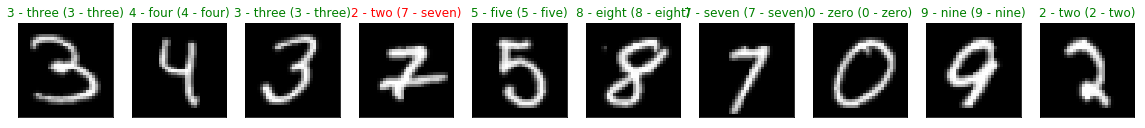

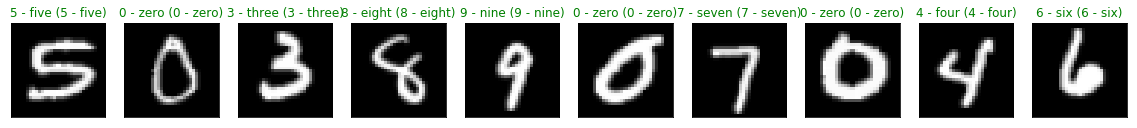

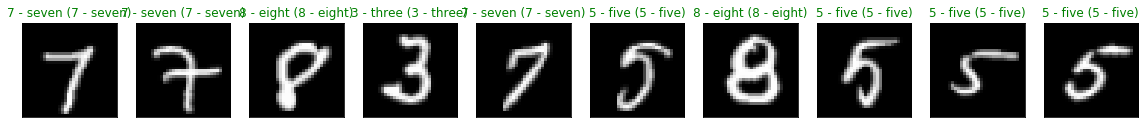

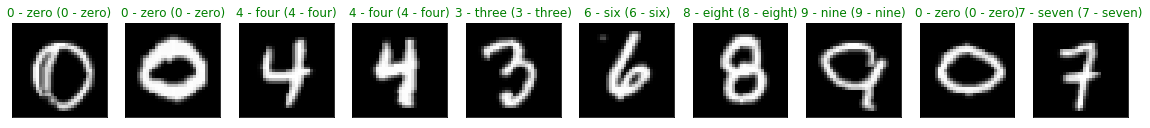

In [9]:
# obtem um lote de imagens de teste
dataiter = iter(dataloaders['test'])
for i in range(4):

    data, target = dataiter.next()
    images = data.numpy()
    
    # get sample outputs
    output = model(data)

    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())

    fig = plt.figure(figsize=(20, 20))
    for idx in range(len(target)):

        ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
        ax.imshow(data[idx][0], cmap='gray')
        ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[target[idx]]), 
                     color=('g' if preds[idx]==target[idx].item() else 'r'))

# Testando a classificação com uma imagem qualquer

Classe: 4 - four


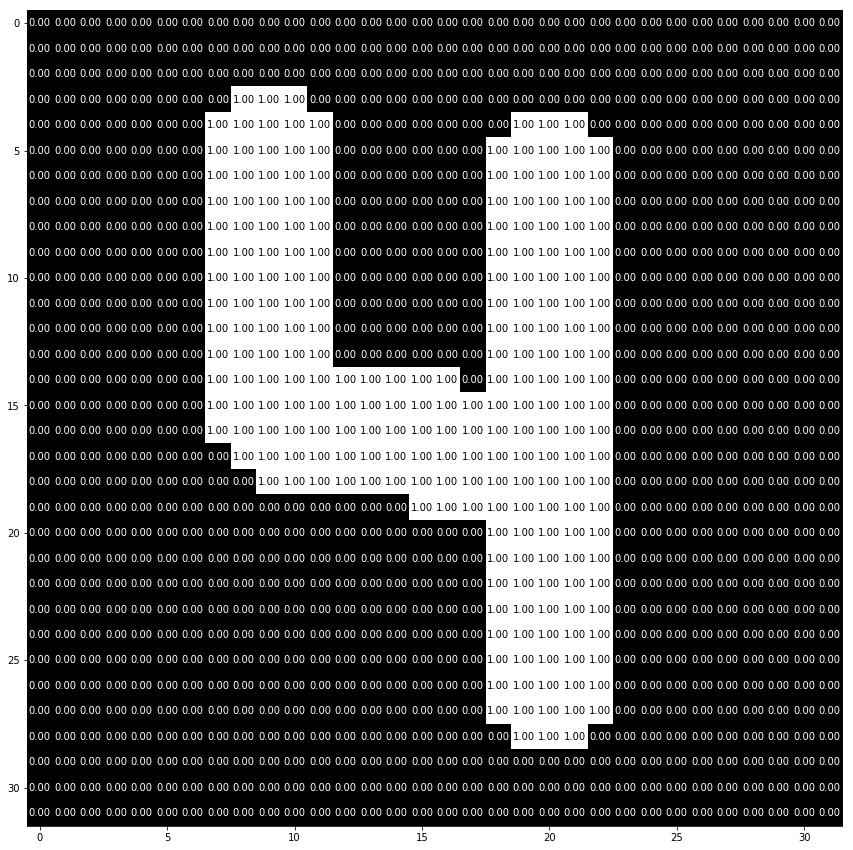

In [11]:
img = read_image('mnist_teste.png')
show_image_details(img[0].numpy())

img_test = img[0].type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)
output = model(img_test)

# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())
print(f"Classe: {class_names[preds]}")

# Analisando uma passagem na rede

Img: torch.Size([1, 3, 32, 32])


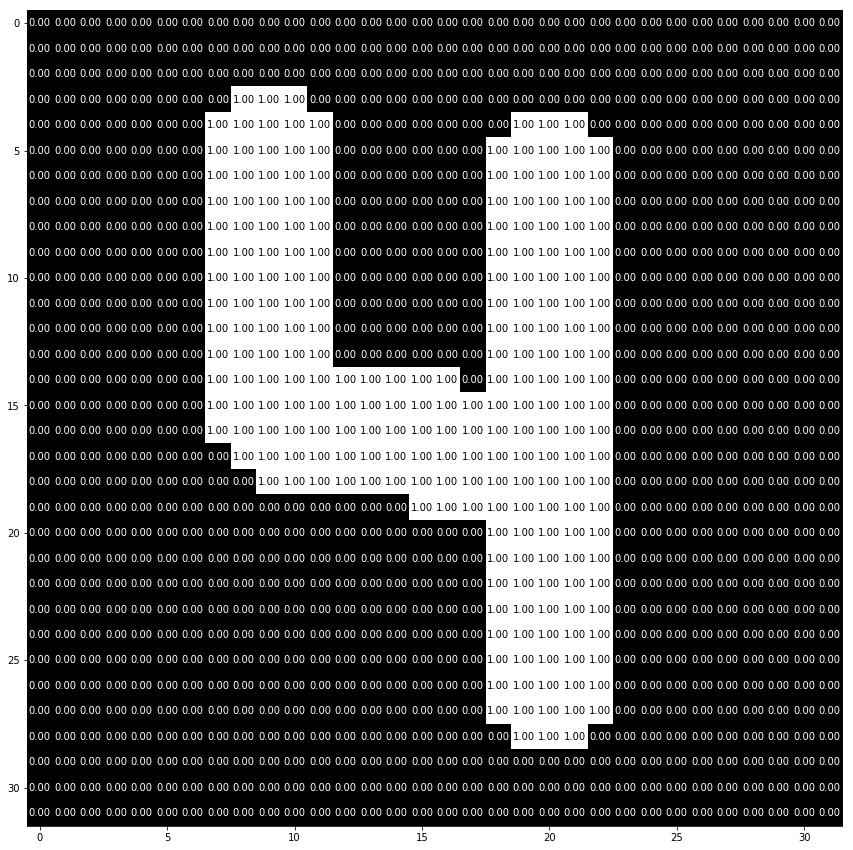

In [14]:
input_img = read_image('mnist_teste.png', resize=False)
show_image_details(input_img[0].numpy())
input_img = input_img.type(torch.FloatTensor).unsqueeze(0)
print(f"Img: {input_img.shape}")

torch.Size([6, 3, 5, 5])
Filtros C1: torch.Size([6, 3, 5, 5])


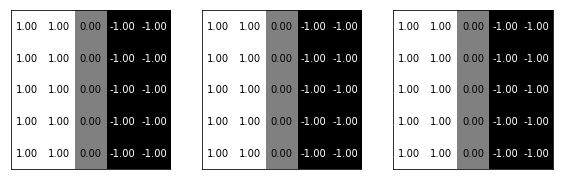

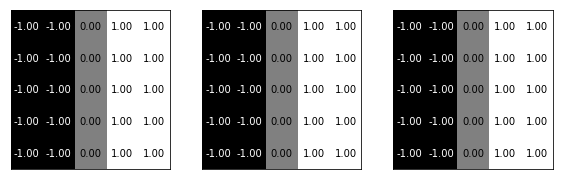

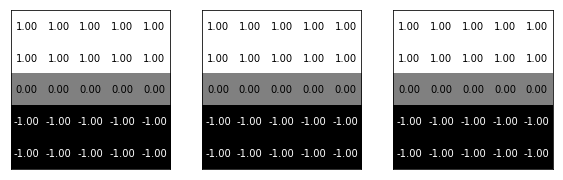

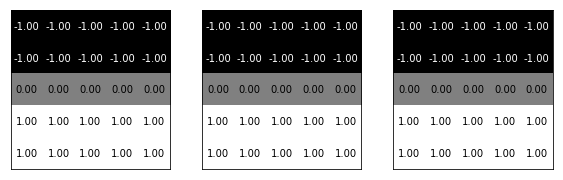

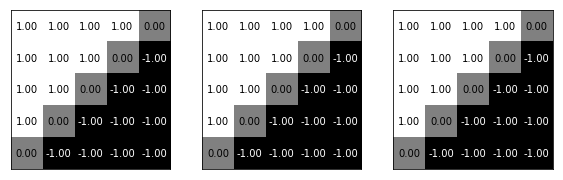

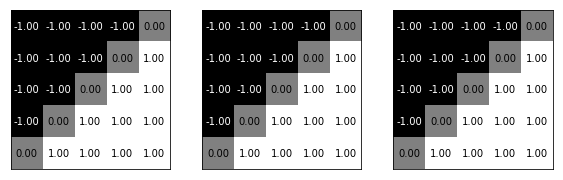

In [13]:
filter_1 = np.array([[1, 1, 0, -1, -1], 
                     [1, 1, 0, -1, -1], 
                     [1, 1, 0, -1, -1],
                     [1, 1, 0, -1, -1],
                     [1, 1, 0, -1, -1]])
filter_2 = np.array([[-1, -1, 0, 1, 1], 
                     [-1, -1, 0, 1, 1], 
                     [-1, -1, 0, 1, 1],
                     [-1, -1, 0, 1, 1],
                     [-1, -1, 0, 1, 1]])
filter_3 = np.array([[1, 1, 1, 1, 1], 
                     [1, 1, 1, 1, 1], 
                     [0, 0, 0, 0, 0],
                     [-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1]])
filter_4 = np.array([[-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1],
                     [0, 0, 0, 0, 0],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1]])
filter_5 = np.array([[1, 1, 1, 1, 0], 
                     [1, 1, 1, 0, -1], 
                     [1, 1, 0, -1, -1],
                     [1, 0, -1, -1, -1],
                     [0, -1, -1, -1, -1]])
filter_6 = np.array([[-1, -1, -1, -1, 0], 
                     [-1, -1, -1, 0, 1], 
                     [-1, -1, 0, 1, 1],
                     [-1, 0, 1, 1, 1],
                     [0, 1, 1, 1, 1]])
filters = np.array([np.array([filter_1, filter_1, filter_1]), 
                    np.array([filter_2, filter_2, filter_2]),
                    np.array([filter_3, filter_3, filter_3]),
                    np.array([filter_4, filter_4, filter_4]),
                    np.array([filter_5, filter_5, filter_5]),
                    np.array([filter_6, filter_6, filter_6])])
filters = torch.from_numpy(filters).type(torch.FloatTensor)
print(filters.shape)

conv_c1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0, bias=False)
conv_c1.weight = torch.nn.Parameter(filters, requires_grad=False)
print(f"Filtros C1: {conv_c1.weight.shape}")
filters = torch.squeeze(conv_c1.weight).detach().numpy()
show_filters(filters)

Conv. C1 Output: torch.Size([1, 6, 28, 28])


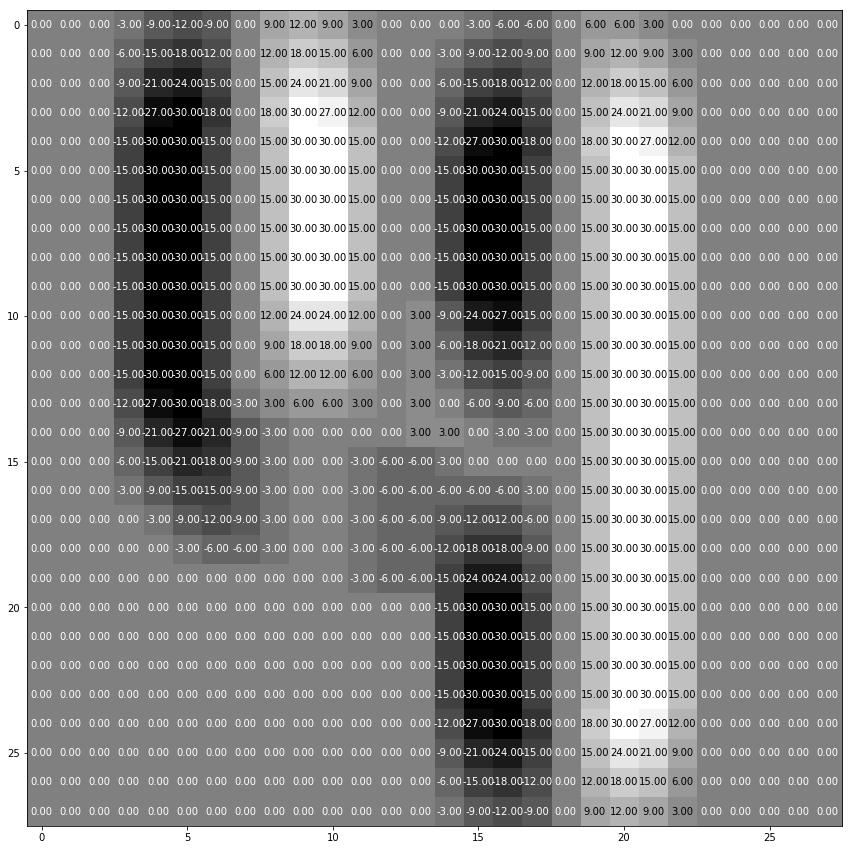

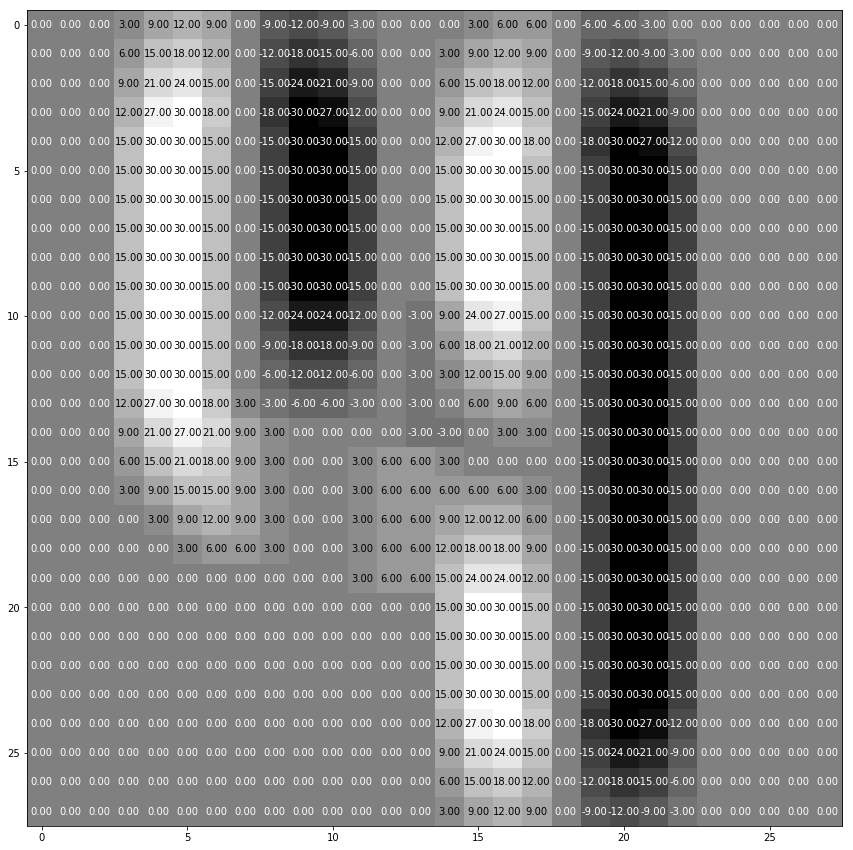

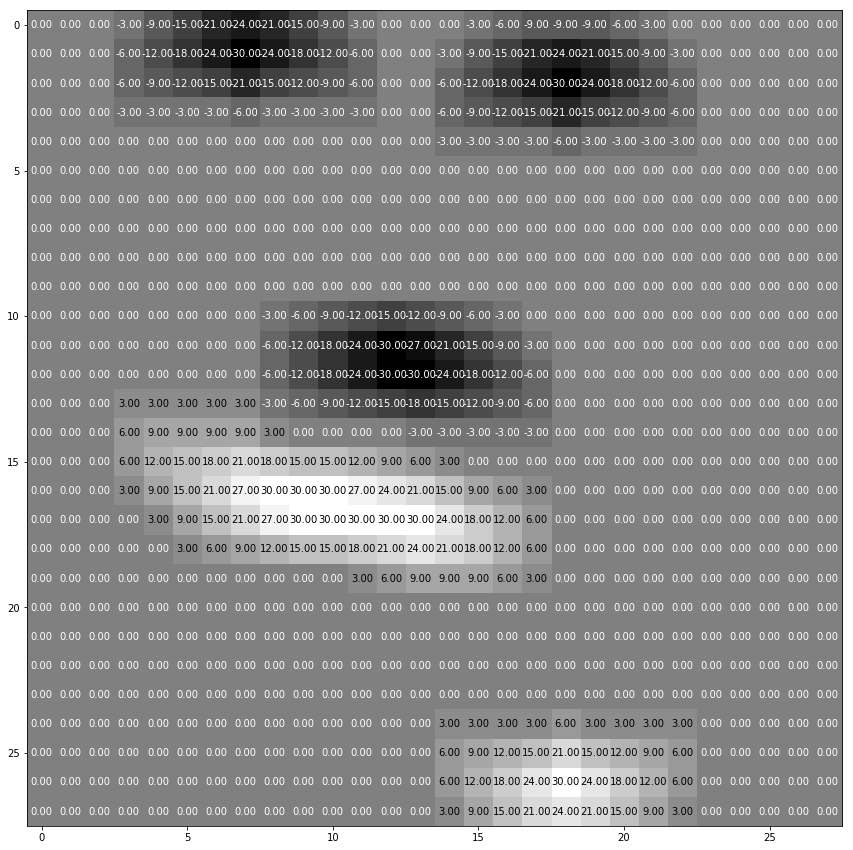

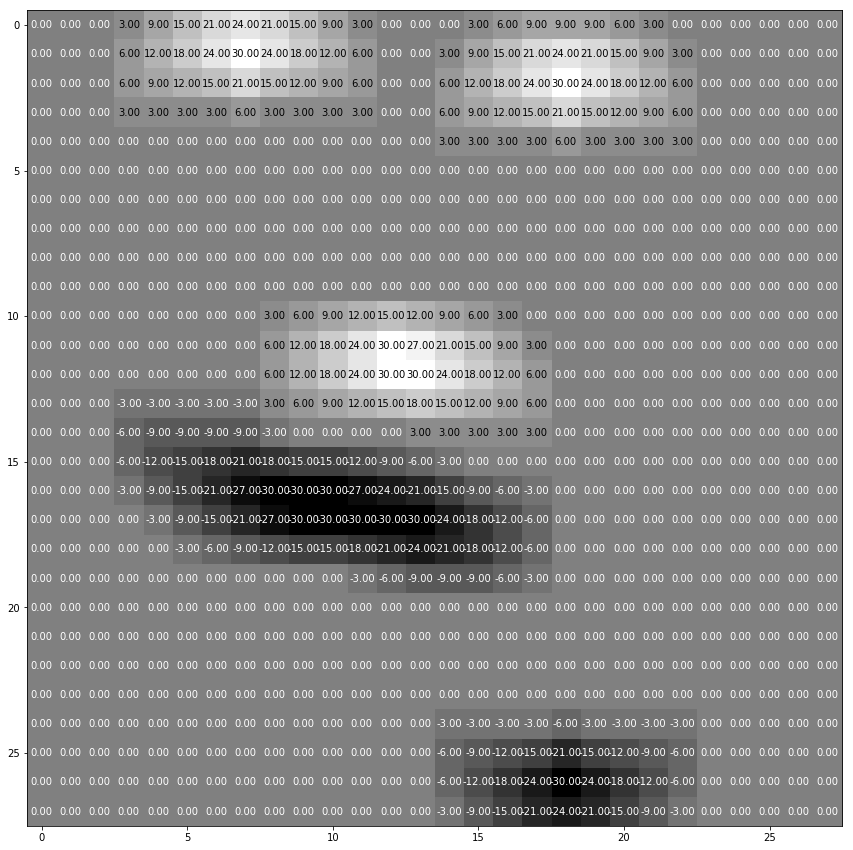

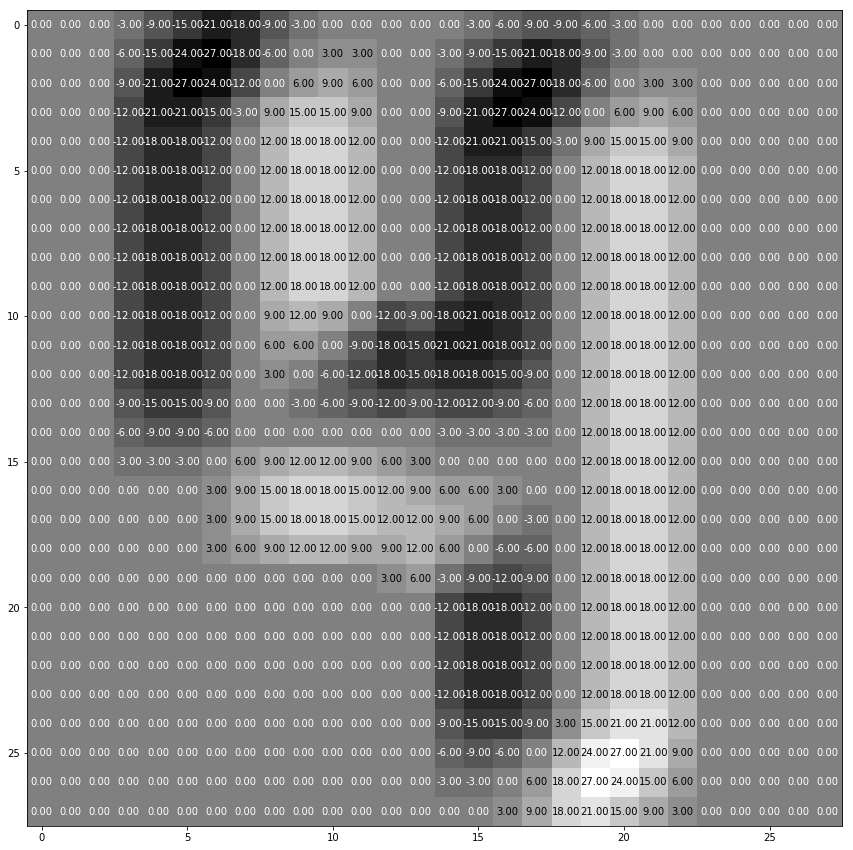

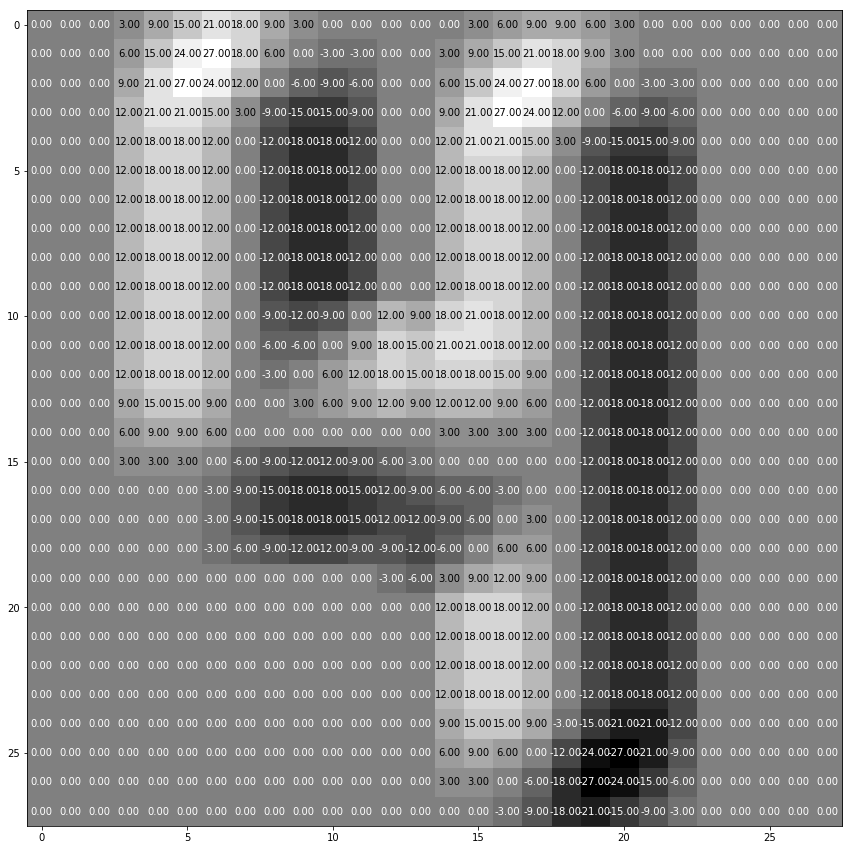

In [15]:
conv_c1_output = conv_c1(input_img)
print(f"Conv. C1 Output: {conv_c1_output.shape}")

show_image_details(conv_c1_output.detach().numpy()[0][0])
show_image_details(conv_c1_output.detach().numpy()[0][1])
show_image_details(conv_c1_output.detach().numpy()[0][2])
show_image_details(conv_c1_output.detach().numpy()[0][3])
show_image_details(conv_c1_output.detach().numpy()[0][4])
show_image_details(conv_c1_output.detach().numpy()[0][5])

In [ ]:
relu_conv_c1_output = F.relu(conv_c1_output)
print(f"ReLU Conv. C1 Output: {relu_conv_c1_output.shape}")

show_image_details(relu_conv_c1_output.detach().numpy()[0][0])
show_image_details(relu_conv_c1_output.detach().numpy()[0][1])
show_image_details(relu_conv_c1_output.detach().numpy()[0][2])
show_image_details(relu_conv_c1_output.detach().numpy()[0][3])
show_image_details(relu_conv_c1_output.detach().numpy()[0][4])
show_image_details(relu_conv_c1_output.detach().numpy()[0][5])

In [ ]:
pool_s2 = nn.MaxPool2d(kernel_size=2, stride=2)
pool_s2_output = pool_s2(relu_conv_c1_output)
print(f"Pool S2 Output: {pool_s2_output.shape}")

show_image_details(pool_s2_output.detach().numpy()[0][0])
show_image_details(pool_s2_output.detach().numpy()[0][1])
show_image_details(pool_s2_output.detach().numpy()[0][2])
show_image_details(pool_s2_output.detach().numpy()[0][3])
show_image_details(pool_s2_output.detach().numpy()[0][4])
show_image_details(pool_s2_output.detach().numpy()[0][5])

In [ ]:
conv_c3 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0, bias=False)
#conv_c3.weight = torch.nn.Parameter(filters, requires_grad=False)
print(f"Filtros C3: {conv_c3.weight.shape}")
filters = torch.squeeze(conv_c3.weight).detach().numpy()
show_filters(filters)

In [ ]:
conv_c3_output = conv_c3(pool_s2_output)
print(f"Conv. C3 Output: {conv_c3_output.shape}")

show_image_details(conv_c3_output.detach().numpy()[0][0])
show_image_details(conv_c3_output.detach().numpy()[0][1])
show_image_details(conv_c3_output.detach().numpy()[0][2])
show_image_details(conv_c3_output.detach().numpy()[0][3])
show_image_details(conv_c3_output.detach().numpy()[0][4])
show_image_details(conv_c3_output.detach().numpy()[0][5])

show_image_details(conv_c3_output.detach().numpy()[0][15])

In [ ]:
relu_conv_c3_output = F.relu(conv_c3_output)
print(f"ReLU Conv. C3 Output: {relu_conv_c3_output.shape}")

show_image_details(relu_conv_c3_output.detach().numpy()[0][0])
show_image_details(relu_conv_c3_output.detach().numpy()[0][1])
show_image_details(relu_conv_c3_output.detach().numpy()[0][2])
show_image_details(relu_conv_c3_output.detach().numpy()[0][3])
show_image_details(relu_conv_c3_output.detach().numpy()[0][4])
show_image_details(relu_conv_c3_output.detach().numpy()[0][5])

show_image_details(relu_conv_c3_output.detach().numpy()[0][15])

In [ ]:
pool_s4 = nn.MaxPool2d(kernel_size=2, stride=2)
pool_s4_output = pool_s4(relu_conv_c3_output)
print(f"Pool S4 Output: {pool_s4_output.shape}")

show_image_details(pool_s4_output.detach().numpy()[0][0])
show_image_details(pool_s4_output.detach().numpy()[0][1])
show_image_details(pool_s4_output.detach().numpy()[0][2])
show_image_details(pool_s4_output.detach().numpy()[0][3])
show_image_details(pool_s4_output.detach().numpy()[0][4])
show_image_details(pool_s4_output.detach().numpy()[0][5])

show_image_details(pool_s4_output.detach().numpy()[0][15])

# ************** ************ *****************************

In [26]:
input_img = np.array([[[0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0]],
                      
                      [[0,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0]]])
input_img = torch.from_numpy(input_img).type(torch.FloatTensor).unsqueeze(0)
print(f"Imagem entrada: {input_img.shape}")
print(input_img)
print("")



filter = np.array([[[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]],
                  
                   [[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]]])
filter = torch.from_numpy(filter).type(torch.FloatTensor).unsqueeze(0)

conv = nn.Conv2d(2, 2, kernel_size=3, bias=False)
#conv.weight = torch.nn.Parameter(filter, requires_grad=False)

print(f"Filtro: {conv.weight.shape}")
print(conv.weight.detach())
print("")

output = conv(input_img)
print(f"Output: {output.shape}")
print(output)
print("")

relu = F.relu(output)
print(f"ReLU: {relu.shape}")
print(relu)


Imagem entrada: torch.Size([1, 2, 5, 5])
tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

Filtro: torch.Size([2, 2, 3, 3])
tensor([[[[ 0.0720, -0.1032,  0.0864],
          [-0.1375, -0.0424,  0.2313],
          [ 0.0244,  0.0329,  0.2346]],

         [[-0.0565, -0.2162, -0.0622],
          [-0.1501, -0.0099, -0.1495],
          [ 0.0570,  0.1753,  0.0240]]],


        [[[-0.0168,  0.0010,  0.0540],
          [-0.1079,  0.0611,  0.0485],
          [ 0.0636,  0.2281, -0.2226]],

         [[ 0.0619,  0.0721, -0.0709],
          [-0.1929, -0.1637,  0.1915],
          [-0.1919,  0.1430, -0.1125]]]])

Output: torch.Size([1, 2, 3, 3])
tensor([[[[ 0.2586,  0.2082,  0.0814],
          [ 0.0818, -0.0523, -0.2876],
         

# Convolução em imagem em níveis de cinza

In [ ]:
input = np.array([[3, 0, 1, 2, 7, 4], 
                  [1, 5, 8, 9, 3, 1], 
                  [2, 7, 2, 5, 1, 3], 
                  [0, 1, 3, 1, 7, 8],
                  [4, 2, 1, 6, 2, 8],
                  [2, 4, 5, 2, 3, 9]])
input = torch.from_numpy(input).type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)
print(f"Input: {input.shape}")
print(input)
print("")

filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
filter = torch.from_numpy(filter).type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)

conv = nn.Conv2d(1, 1, kernel_size=3, bias=False)
conv.weight = torch.nn.Parameter(filter, requires_grad=False)

print(f"Filtro: {conv.weight.shape}")
print(conv.weight.detach())
#show_image_details(conv.weight.detach().numpy()[0][0], normalize=False, size=(5, 5))
print("")

output = conv(input)
print(f"Output: {output.shape}")
print(output)
print("")

print("ReLU:")
F.relu(output)

# Convolução em imagem colorida

In [22]:
input = np.array([[[3, 0, 1, 2, 7, 4], 
                  [1, 5, 8, 9, 3, 1], 
                  [2, 7, 2, 5, 1, 3], 
                  [0, 1, 3, 1, 7, 8],
                  [4, 2, 1, 6, 2, 8],
                  [2, 4, 5, 2, 3, 9]],
                  
                  [[3, 0, 1, 2, 7, 4], 
                  [1, 5, 8, 9, 3, 1], 
                  [2, 7, 2, 5, 1, 3], 
                  [0, 1, 3, 1, 7, 8],
                  [4, 2, 1, 6, 2, 8],
                  [2, 4, 5, 2, 3, 9]],
                  
                  [[3, 0, 1, 2, 7, 4],                    
                  [1, 5, 8, 9, 3, 1], 
                  [2, 7, 2, 5, 1, 3], 
                  [0, 1, 3, 1, 7, 8],
                  [4, 2, 1, 6, 2, 8],
                  [2, 4, 5, 2, 3, 9]]])
input = torch.from_numpy(input).type(torch.FloatTensor).unsqueeze(0)
print(f"Input: {input.shape}")
print(input)
print("")

filter = np.array([[[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]],
                  
                   [[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]],
                   
                   [[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]]])
filter = torch.from_numpy(filter).type(torch.FloatTensor).unsqueeze(0)

conv = nn.Conv2d(3, 3, kernel_size=3, bias=False)
#conv.weight = torch.nn.Parameter(filter, requires_grad=False)

print(f"Filtro: {conv.weight.shape}")
print(conv.weight.detach())
print("")

output = conv(input)
print(f"Output: {output.shape}")
print(output)
print("")

relu = F.relu(output)
print(f"ReLU: {relu.shape}")
print(relu)


Input: torch.Size([1, 3, 6, 6])
tensor([[[[3., 0., 1., 2., 7., 4.],
          [1., 5., 8., 9., 3., 1.],
          [2., 7., 2., 5., 1., 3.],
          [0., 1., 3., 1., 7., 8.],
          [4., 2., 1., 6., 2., 8.],
          [2., 4., 5., 2., 3., 9.]],

         [[3., 0., 1., 2., 7., 4.],
          [1., 5., 8., 9., 3., 1.],
          [2., 7., 2., 5., 1., 3.],
          [0., 1., 3., 1., 7., 8.],
          [4., 2., 1., 6., 2., 8.],
          [2., 4., 5., 2., 3., 9.]],

         [[3., 0., 1., 2., 7., 4.],
          [1., 5., 8., 9., 3., 1.],
          [2., 7., 2., 5., 1., 3.],
          [0., 1., 3., 1., 7., 8.],
          [4., 2., 1., 6., 2., 8.],
          [2., 4., 5., 2., 3., 9.]]]])

Filtro: torch.Size([3, 3, 3, 3])
tensor([[[[ 0.1765, -0.0455,  0.0176],
          [ 0.1623, -0.1917,  0.1446],
          [-0.0139,  0.1817, -0.0377]],

         [[ 0.0640, -0.0141, -0.1261],
          [-0.0044,  0.1157,  0.0165],
          [-0.1521, -0.0211,  0.0909]],

         [[-0.0713,  0.0712,  0.0230],
  